                              CLASSIFICATION PROGRAM 

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
# Load cleaned dataset
df = df = pd.read_csv("Loan Prediction Dataset.csv")
#Drop ID column
if 'Loan_ID' in df.columns:
    df.drop(columns=['Loan_ID'], inplace=True)

In [18]:
for col in df.select_dtypes(include=[np.number]).columns:    #IN COLUMNS WE FILL THE NAN VALUES TO NUMBER
    df[col] = df[col].fillna(df[col].mean())

In [19]:
#Fix missing categorical values 
for col in df.select_dtypes(include=['object']).columns:         #HERE OBJECT AS A STRING VALUE
    df[col].fillna(df[col].mode()[0])

df['LoanAmountLog']

            Refers to the column named "LoanAmountLog" in the DataFrame df.

replace([np.inf, -np.inf], np.nan)

           The .replace() method is used to substitute specific values in the Series (or DataFrame) with new values.

Here, the list [np.inf, -np.inf] means positive infinity (np.inf) and negative infinity (-np.inf).

These are special values that can appear in numerical computations (for example, taking the log of zero or dividing by zero).

np.nan

Represents a missing value ("Not a Number") in NumPy and pandas.

THEREFORE

This command replaces all infinite values (both positive and negative) in the "LoanAmountLog" column with NaN (missing values).

In [20]:
#Create LoanAmountLog safely
if 'LoanAmountLog' not in df.columns:
    df['LoanAmountLog'] = np.log(df['LoanAmount'] + 1)
df['LoanAmountLog'].replace([np.inf, -np.inf], np.nan)
df['LoanAmountLog'].fillna(df['LoanAmountLog'].mean())

0      4.993232
1      4.859812
2      4.204693
3      4.795791
4      4.955827
         ...   
609    4.276666
610    3.713572
611    5.537334
612    5.236442
613    4.897840
Name: LoanAmountLog, Length: 614, dtype: float64

In [21]:
#Target / Features split
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [22]:
# Encode target (Y/N → 1/0)
le = LabelEncoder()
y = le.fit_transform(y)

In [23]:
#Convert categorical columns to numeric
X = pd.get_dummies(X, drop_first=True)

In [24]:
#Double check for any NaNs (critical)
if X.isnull().sum().sum() > 0:
    print("⚠️ Still NaNs found, filling with mean...")
    X.fillna(X.mean(), inplace=True)

In [25]:
# Confirm no missing values left
print("✅ NaNs remaining in X:", X.isnull().sum().sum())

✅ NaNs remaining in X: 0


In [26]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                            CONFUSION MATRIX 

In [27]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#Evaluate
y_pred = model.predict(X_test)
print("\n✅ Model trained successfully!")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Model trained successfully!
Accuracy: 0.7886178861788617

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Confusion Matrix:
 [[18 25]
 [ 1 79]]


C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[18, 25],
       [ 1, 79]])

<Axes: >

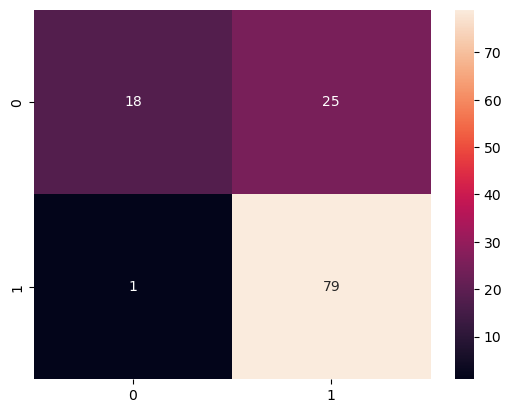

In [30]:
sns.heatmap(cm, annot=True)